# Feature Engineering



## Objectives

*   Engineer features for Regression model


## Inputs

* inputs/datasets/cleaned/test_df_cleaned.pkl
* inputs/datasets/cleaned/train_df_cleaned.pkl

## Outputs

* generate a list with variables to engineer

## Conclusions

* Feature Engineering Transformers
* 
* 

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Film_Hit_prediction/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir


'/workspace/Film_Hit_prediction'

---

# Load Cleaned Data

Train Set

In [25]:
import os
import pandas as pd

# Correct path relative to the current directory
Train_set_path = "/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/train_df_cleaned.pkl"

try:
    TrainSet = pd.read_pickle(Train_set_path)
    print(TrainSet.head(3))
    print("Shape of the dataframe:", TrainSet.shape)
except FileNotFoundError:
    print(f"File not found at path: {Train_set_path}")

          budget     revenue  runtime  language_encoded  Action  Adventure  \
4688         0.0         0.0     87.0               7.0     0.0        0.0   
2951  11000000.0  32935319.0    105.0               7.0     0.0        0.0   
4071   2000000.0  78898765.0    115.0               7.0     1.0        1.0   

      Animation  Comedy  Crime  Documentary  ...  cast_Woody Harrelson  \
4688        0.0     0.0    0.0          0.0  ...                   0.0   
2951        0.0     0.0    0.0          0.0  ...                   0.0   
4071        0.0     0.0    0.0          0.0  ...                   0.0   

      cast_Xander Berkeley  cast_Yasiin Bey  cast_Yul Vazquez  cast_Zac Efron  \
4688                   0.0              0.0               0.0             0.0   
2951                   0.0              0.0               0.0             0.0   
4071                   0.0              0.0               0.0             0.0   

      cast_Zach Galifianakis  cast_Zeljko Ivanek  cast_Zoe Saldan

Test Set

In [26]:
import os
import pandas as pd

# Correct path relative to the current directory
Test_set_path = "/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/test_df_cleaned.pkl"

try:
    TestSet = pd.read_pickle(Test_set_path)
    print(TestSet.head(3))
    print("Shape of the dataframe:", TestSet.shape)
except FileNotFoundError:
    print(f"File not found at path: {Test_set_path}")

          budget     revenue  runtime  language_encoded  Action  Adventure  \
596   70000000.0  33561137.0     97.0               7.0     1.0        1.0   
3372         7.0         5.0     90.0               7.0     1.0        0.0   
2702  14000000.0   5108820.0     90.0               7.0     0.0        0.0   

      Animation  Comedy  Crime  Documentary  ...  cast_Woody Harrelson  \
596         0.0     1.0    0.0          0.0  ...                   0.0   
3372        0.0     0.0    1.0          0.0  ...                   0.0   
2702        0.0     0.0    0.0          0.0  ...                   0.0   

      cast_Xander Berkeley  cast_Yasiin Bey  cast_Yul Vazquez  cast_Zac Efron  \
596                    0.0              0.0               0.0             0.0   
3372                   0.0              0.0               0.0             0.0   
2702                   0.0              0.0               0.0             0.0   

      cast_Zach Galifianakis  cast_Zeljko Ivanek  cast_Zoe Saldan

# Data Exploration

Evaluate potential transformations to be made


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

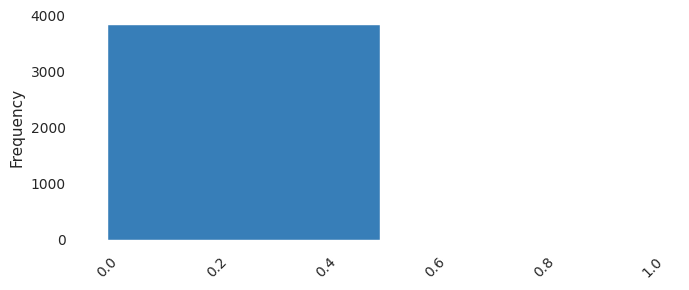

In [28]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=TrainSet, minimal=True)
pandas_report.to_notebook_iframe()

# Correlation and PPS Analysis

* We don’t expect changes compared to the data cleaning notebook 

# Feature Engineering

## Custom function

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

def top_revenue_actors(train_df, n_actors=100):
    
    #Find actors most correlated with high revenue
    cast_cols = [col for col in train_df.columns if col.startswith('cast_')]
    
    # Calculate average revenue for movies with each actor
    actor_revenues = {}
    for col in cast_cols:
        actor_name = col.replace('cast_', '')

        # Only consider actors in multiple movies
        if train_df[col].sum() >= 10:
            avg_revenue = train_df[train_df[col] == 1]['revenue'].mean()
            actor_revenues[actor_name] = avg_revenue
    
    # Sort actors by average revenue
    top_actors = sorted(actor_revenues.items(), key=lambda x: x[1], reverse=True)[:n_actors]
    
    # print top revenue actors
    print("\nTop revenue-generating actors:")
    for actor, avg_rev in top_actors[:100]:  
        print(f"- {actor}: Average revenue ${avg_rev:,.2f}")

    # Convert top_actors to list of column names
    top_actor_cols = [f"cast_{actor}" for actor, _ in top_actors]

    # Process train and test data
    processed_dfs = []
    for df in [train_df, test_df]:
        processed = df.copy()

    # Add top actor columns
    for actor_col in top_actor_cols:
        processed[actor_col] = df[actor_col] if actor_col in df else 0
        
    # Calculate other_actor_count
    all_cast_cols = [col for col in df.columns if col.startswith('cast_')]
    other_cast_cols = [col for col in all_cast_cols if col not in top_actor_cols]
    processed['other_actor_count'] = df[other_cast_cols].sum(axis=1)
        
    # Drop original cast columns
    cols_to_keep = [col for col in train_processed.columns 
                   if not col.startswith('cast_') or col in top_actor_cols]
    cols_to_keep.append('other_actor_count')
    processed = processed[cols_to_keep]

    processed_dfs.append(processed)
    
    train_processed = train_processed[cols_to_keep]
    test_processed = test_processed[cols_to_keep]

    # Save top actors for future use
    with open('top_revenue_actors.pkl', 'wb') as f:
        pickle.dump(top_revenue_actor_cols, f)
    
    return processed_dfs[0], processed_dfs[1]

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

    

def top_revenue_directors(train_df, n_directors=100):
    # Find top revenue-generating directors
    director_cols = [col for col in train_df.columns if col.startswith('director_')]
    
    # Calculate average revenue for directors with multiple movies
    director_revenues = {}
    for col in director_cols:
        director_name = col.replace('director_', '')
        if train_df[col].sum() >= 5:
            avg_revenue = train_df[train_df[col] == 1]['revenue'].mean()
            director_revenues[director_name] = avg_revenue
    
     # Sort and get top directors
    top_directors = sorted(director_revenues.items(), key=lambda x: x[1], reverse=True)[:n_directors]
    
    # Print results
    print("\nTop revenue-generating directors:")
    for director, avg_rev in top_directors:
        print(f"- {director}: Average revenue ${avg_rev:,.2f}")
    
    # Convert to column names
    top_director_cols = [f"director_{director}" for director, _ in top_directors]
    
    # Process train and test data
    processed_dfs = []
    for df in [train_df, test_df]:
        processed = df.copy()
        
        # Calculate other_directors (sum of all non-top directors)
        all_director_cols = [col for col in df.columns if col.startswith('director_')]
        other_director_cols = [col for col in all_director_cols if col not in top_director_cols]
        processed['other_directors'] = df[other_director_cols].sum(axis=1)
        
        # Keep only relevant columns
        cols_to_keep = ([col for col in processed.columns 
                        if not col.startswith('director_')] +
                       top_director_cols + ['other_directors'])
        processed = processed[cols_to_keep]
        processed_dfs.append(processed)

    # If you want to save the top producers for later use:
    with open('top_revenue_directors.pkl', 'wb') as f:
        pickle.dump(top_revenue_directors_cols, f)
        print(f"Saved top_revenue_directors")
    
    return processed_dfs[0], processed_dfs[1], top_director_cols

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle


def top_revenue_writers(train_df, n_writers=100):
    # Find top revenue-generating writers
    writer_cols = [col for col in train_df.columns if col.startswith('writer_')]
    
    # Calculate average revenue for writers with multiple movies
    writer_revenues = {}
    for col in writer_cols:
        writer_name = col.replace('writer_', '')
        if train_df[col].sum() >= 5:
            avg_revenue = train_df[train_df[col] == 1]['revenue'].mean()
            writer_revenues[writer_name] = avg_revenue
    
    # Sort and get top writers
    top_writers = sorted(writer_revenues.items(), key=lambda x: x[1], reverse=True)[:n_writers]
    
    # Print results
    print("\nTop revenue-generating writers:")
    for writer, avg_rev in top_writers:
        print(f"- {writer}: Average revenue ${avg_rev:,.2f}")
    
    # Convert to column names
    top_writer_cols = [f"writer_{writer}" for writer, _ in top_writers]
    
    # Process train and test data
    processed_dfs = []
    for df in [train_df, test_df]:
        processed = df.copy()
        
        # Calculate other_writers (sum of all non-top writers)
        all_writer_cols = [col for col in df.columns if col.startswith('writer_')]
        other_writer_cols = [col for col in all_writer_cols if col not in top_writer_cols]
        processed['other_writers'] = df[other_writer_cols].sum(axis=1)
        
        # Keep only relevant columns
        cols_to_keep = ([col for col in processed.columns 
                        if not col.startswith('writer_')] +
                       top_writer_cols + ['other_writers'])
        processed = processed[cols_to_keep]
        processed_dfs.append(processed)

        # If you want to save the top writers for later use:
    with open('top_revenue_writers.pkl', 'wb') as f:
        pickle.dump(top_writer_cols, f)
        print(f"Saved top_revenue_writers")
    
    return processed_dfs[0], processed_dfs[1], top_writer_cols


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

    
        

def top_revenue_producers(train_df, n_producers=100):
    # Find top revenue-generating producers
    producer_cols = [col for col in train_df.columns if col.startswith('producer_')]

    # Calculate average revenue for producers with multiple movies
    producer_revenues = {}
    for col in producer_cols:
        producer_name = col.replace('producer_', '')
        if train_df[col].sum() >= 5:
            avg_revenue = train_df[train_df[col] == 1]['revenue'].mean()
            producer_revenues[producer_name] = avg_revenue
    
    # Sort and get top producers
    top_producers = sorted(producer_revenues.items(), key=lambda x: x[1], reverse=True)[:n_producers]
    
    # Print results
    print("\nTop revenue-generating producers:")
    for producer, avg_rev in top_producers:
        print(f"- {producer}: Average revenue ${avg_rev:,.2f}")
    
    # Convert to column names
    top_producer_cols = [f"producer_{producer}" for producer, _ in top_producers]

    # If you want to save the top producers for later use:
    with open('top_revenue_producers.pkl', 'wb') as f:
        pickle.dump(top_revenue_producer_cols, f)
    
    # Process train and test data
    processed_dfs = []
    for df in [train_df, test_df]:
        processed = df.copy()
        
        # Calculate other_producers (sum of all non-top producers)
        all_producer_cols = [col for col in df.columns if col.startswith('producer_')]
        other_producer_cols = [col for col in all_producer_cols if col not in top_producer_cols]
        processed['other_producers'] = df[other_producer_cols].sum(axis=1)
        
        # Keep only relevant columns
        cols_to_keep = ([col for col in processed.columns 
                        if not col.startswith('producer_')] +
                       top_producer_cols + ['other_producers'])
        processed = processed[cols_to_keep]
        processed_dfs.append(processed)

        # If you want to save the top producers for later use:
    with open('top_revenue_producers.pkl', 'wb') as f:
        pickle.dump(top_producer_cols, f)
        print(f"Saved top_revenue_producers")
    
    return processed_dfs[0], processed_dfs[1], top_producer_cols

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle
  

def process_new_movie (actor1, actor2, director, writer, producer):
    """
    Process new movie input with two actors
    """
    try:
        # Load all saved data
        with open('top_revenue_actors.pkl', 'rb') as f:
            top_actors = pickle.load(f)
        with open('top_revenue_directors.pkl', 'rb') as f:
            top_directors = pickle.load(f)
        with open('top_revenue:writers.pkl', 'rb') as f:
            top_writers = pickle.load(f)
        with open('top_revenue_producers.pkl', 'rb') as f:
            top_producers = pickle.load(f)
        
        features = {}
        
        # Process actors
        if actor1 in top_people['top_actors']:
            features[f'cast_{actor1}'] = 1
        else:
            features['other_actors'] = 1
            
        if actor2 in top_people['top_actors']:
            features[f'cast_{actor2}'] = 1
            features['other_actors'] = features.get('other_actors', 0)
        else:
            features['other_actors'] = features.get('other_actors', 0) + 1

        # Process crew
        for role, person in [('directors', director), ('writers', writer), ('producers', producer)]:
            if person in top_people[f'top_{role}']:
                features[f'{role[:-1]}_{person}'] = 1
                features[f'other_{role}'] = 0
            else:
                features[f'other_{role}'] = 1
        # Fill zeros for all missing top people
        for role in ['actors', 'directors', 'writers', 'producers']:
            for person in top_people[f'top_{role}']:
                if person not in features:
                    features[person] = 0
        
        return features
        
    except FileNotFoundError:
        print("Error: Top people data not found. Please run feature engineering first.")
        return None


def engineer_movie_features(train_df, test_df):
    print("Starting feature engineering...")

    train_processed = train_df.copy()
    test_processed = test_df.copy()

    # 1. BUDGET FEATURES
    print("\nEngineering budget features...")

    # Remove movies without budget data
    train_processed = train_processed[train_processed['budget'] > 0]
    test_processed = test_processed[test_processed['budget'] > 0]
    
    # Log transform budget
    train_processed['log_budget'] = np.log1p(train_processed['budget'])
    test_processed['log_budget'] = np.log1p(test_processed['budget'])

    # Budget per minute
    train_processed['budget_per_minute'] = train_processed['budget'] / train_processed['runtime'].replace(0, np.nan)
    test_processed['budget_per_minute'] = test_processed['budget'] / test_processed['runtime'].replace(0, np.nan)
    
    print(f"Removed {len(train_df) - len(train_processed)} training movies without budget")
    print(f"Removed {len(test_df) - len(test_processed)} test movies without budget")
    
    # 2. RUNTIME FEATURES
    print("Engineering runtime features...")

    # Remove movies shorter than 90 minutes
    train_processed['is_long_movie'] = (train_processed['runtime'] > 60).astype(int)
    test_processed['is_long_movie'] = (test_processed['runtime'] > 60).astype(int)

    print(f"Removed {len(train_df) - len(train_processed)} training movies shorter than 60 minutes")
    print(f"Removed {len(test_df) - len(test_processed)} test movies shorter than 60 minutes")

    # Flag for long movies (over 90 minutes)
    train_processed['is_long_movie'] = (train_processed['runtime'] > 90).astype(int)
    test_processed['is_long_movie'] = (test_processed['runtime'] > 90).astype(int)

    # Budget per minute (after removing short movies)
    train_processed['budget_per_minute'] = train_processed['budget'] / train_processed['runtime']
    test_processed['budget_per_minute'] = test_processed['budget'] / test_processed['runtime']


    for genre1, genre2 in genre_pairs:
        if genre1 in train_processed.columns and genre2 in train_processed.columns:
            column_name = f'{genre1}_{genre2}'
            train_processed[column_name] = ((train_processed[genre1] == 1) & 
                                         (train_processed[genre2] == 1)).astype(int)
            test_processed[column_name] = ((test_processed[genre1] == 1) & 
                                        (test_processed[genre2] == 1)).astype(int)
    
        
    # 4. CAST/CREW FEATURES
    print ("Engineering cast/crew features...")

    # Get 100 top cast, directors, writers, producers
    top_actor_cols = find_top_revenue_actors(train_processed)
    top_director_cols = find_top_revenue_directors(train_processed)
    top_writer_cols = find_top_revenue_writers(train_processed)
    top_producer_cols = find_top_revenue_producers(train_processed)

    # Process directors
    director_cols = [col for col in train_processed.columns if col.startswith('director_')]
    other_director_cols = [col for col in director_cols if col not in top_director_cols]
    train_processed['other_directors'] = train_processed[other_director_cols].sum(axis=1)
    test_processed['other_directors'] = test_processed[other_director_cols].sum(axis=1)

    # Process writers
    writer_cols = [col for col in train_processed.columns if col.startswith('writer_')]
    other_writer_cols = [col for col in writer_cols if col not in top_writer_cols]
    train_processed['other_writers'] = train_processed[other_writer_cols].sum(axis=1)
    test_processed['other_writers'] = test_processed[other_writer_cols].sum(axis=1)

    # Process producers
    producer_cols = [col for col in train_processed.columns if col.startswith('producer_')]
    other_producer_cols = [col for col in producer_cols if col not in top_producer_cols]
    train_processed['other_producers'] = train_processed[other_producer_cols].sum(axis=1)
    test_processed['other_producers'] = test_processed[other_producer_cols].sum(axis=1)

    # Update cols_to_keep
    cols_to_keep.extend(top_director_cols + ['other_directors'])
    cols_to_keep.extend(top_writer_cols + ['other_writers'])
    cols_to_keep.extend(top_producer_cols + ['other_producers'])

    # Get all cast columns
    cast_cols = [col for col in train_processed.columns if col.startswith('cast_')]

    # Create 'other_actors' column for all non-top actors
    other_cast_cols = [col for col in cast_cols if col not in top_actor_cols]
    train_processed['other_actors'] = train_processed[other_cast_cols].sum(axis=1)
    test_processed['other_actors'] = test_processed[other_cast_cols].sum(axis=1)

    # Keep only relevant columns
    cols_to_keep = ([col for col in train_processed.columns if not col.startswith('cast_')] + 
                    top_actor_cols + ['other_actors'])
    train_processed = train_processed[cols_to_keep]
    test_processed = test_processed[cols_to_keep]

    #save the top peopel

    with open('top_movie_people.pkl', 'wb') as f:
        pickle.dump({
            'top_actors': top_actors,
            'top_directors': top_director_cols,
            'top_writers': top_writer_cols,
            'top_producers': top_producer_cols
        }, f)

    # 5. LANGUAGE FEATURES
    print("Engineering language features...")
    # Binary flag for English language
    train_processed['is_english'] = (train_processed['language_encoded'] == 7).astype(int)
    test_processed['is_english'] = (test_processed['language_encoded'] == 7).astype(int)
    
    # 6. SCALING NUMERICAL FEATURES
    print("Scaling numerical features...")
    scaler = StandardScaler()

    # Identify numerical columns to scale
    numeric_cols = ['budget', 'log_budget', 'runtime', 'budget_per_minute', 
                   'genre_count', 'total_cast', 'other_cast_count']
    
    # Fit scaler on training data and transform both datasets
    train_processed[numeric_cols] = scaler.fit_transform(train_processed[numeric_cols])
    test_processed[numeric_cols] = scaler.transform(test_processed[numeric_cols])
    
    # 7. Handle missing values
    print("Handling missing values...")
    for col in train_processed.columns:
        if train_processed[col].dtype in [np.float64, np.float32]:
            # Fill missing values with median from training data
            median_val = train_processed[col].median()
            train_processed[col] = train_processed[col].fillna(median_val)
            test_processed[col] = test_processed[col].fillna(median_val)
    
    print("\nFeature engineering completed!")
    print(f"Training data shape: {train_processed.shape}")
    print(f"Test data shape: {test_processed.shape}")
    
    return train_processed, test_processed

def prepare_for_modeling(train_df, test_df):
    """
    Complete pipeline to prepare data for modeling
    """
    # 1. Engineer features
    train_engineered, test_engineered = engineer_movie_features(train_df, test_df)
    
    # 2. Prepare features (X) and target (y)
    X_train = train_engineered.drop('revenue', axis=1)
    y_train = np.log1p(train_engineered['revenue'])  # Log transform the target
    
    X_test = test_engineered.drop('revenue', axis=1)
    y_test = np.log1p(test_engineered['revenue'])  # Log transform the target
    
    return X_train, X_test, y_train, y_test


    

## Feature Engineering Spreadsheet Summary


- Languages are properly encoded using LabelEncoder
- Genre columnes are already one-hot encoded
- Budget is both log- transformed and scaled
- Saved the encoders and scalers
- Target variable (revenue) is Lon-transformed to handle skewness and scaled using StandardScaler
- Processed datasets are saved.
    

